In [1]:
import pandas as pd

In [2]:
import os
import sys
# Let's read all the files in the folder
path = 'oscar_rn_2'
all_csv = []
for filename in os.listdir(path):
    # Now we read the file
    df = pd.read_csv(path + '/' + filename)
    # And append it to the list
    all_csv.append(df)

In [3]:
# Now we concatenate all the files
df = pd.concat(all_csv, ignore_index=True)

In [4]:
df.head()

,CountryName,RegionName,Date,RN,PredictedDailyNewCases,PredictedDailyNewRatios
0,Afghanistan,NaN,2021-06-28,0.948768,291,0.997666
1,Afghanistan,NaN,2021-06-29,0.948768,1731,0.996561
2,Afghanistan,NaN,2021-06-30,0.948768,2054,0.992731
3,Afghanistan,NaN,2021-07-01,0.948768,1388,0.989344
4,Afghanistan,NaN,2021-07-02,0.948768,1837,0.985413


In [5]:
# Let's get a df with the following CountryName
training_geos = ["Germany", "Spain", "United Kingdom", "Italy", "France",
                 "Poland", "Belgium", "Greece",
                 "Czech Republic", "Sweden", "Portugal", "Austria", "South Africa",
                 "United States", "Canada", "Spain", "Brazil", "Argentina","France","Colombia","Australia"
                 "Chile"]
df_training = df[df['CountryName'].isin(training_geos)]
df_training.head()

,CountryName,RegionName,Date,RN,PredictedDailyNewCases,PredictedDailyNewRatios
310,Argentina,NaN,2021-06-28,0.956827,0,1.223651
311,Argentina,NaN,2021-06-29,0.956827,14663,1.225420
312,Argentina,NaN,2021-06-30,0.956827,20202,1.224562
313,Argentina,NaN,2021-07-01,0.956827,16064,1.213338
314,Argentina,NaN,2021-07-02,0.956827,15005,1.203216


In [6]:

# SORT THE DATAFRAME BY DATE
df_training = df_training.sort_values(by='Date')

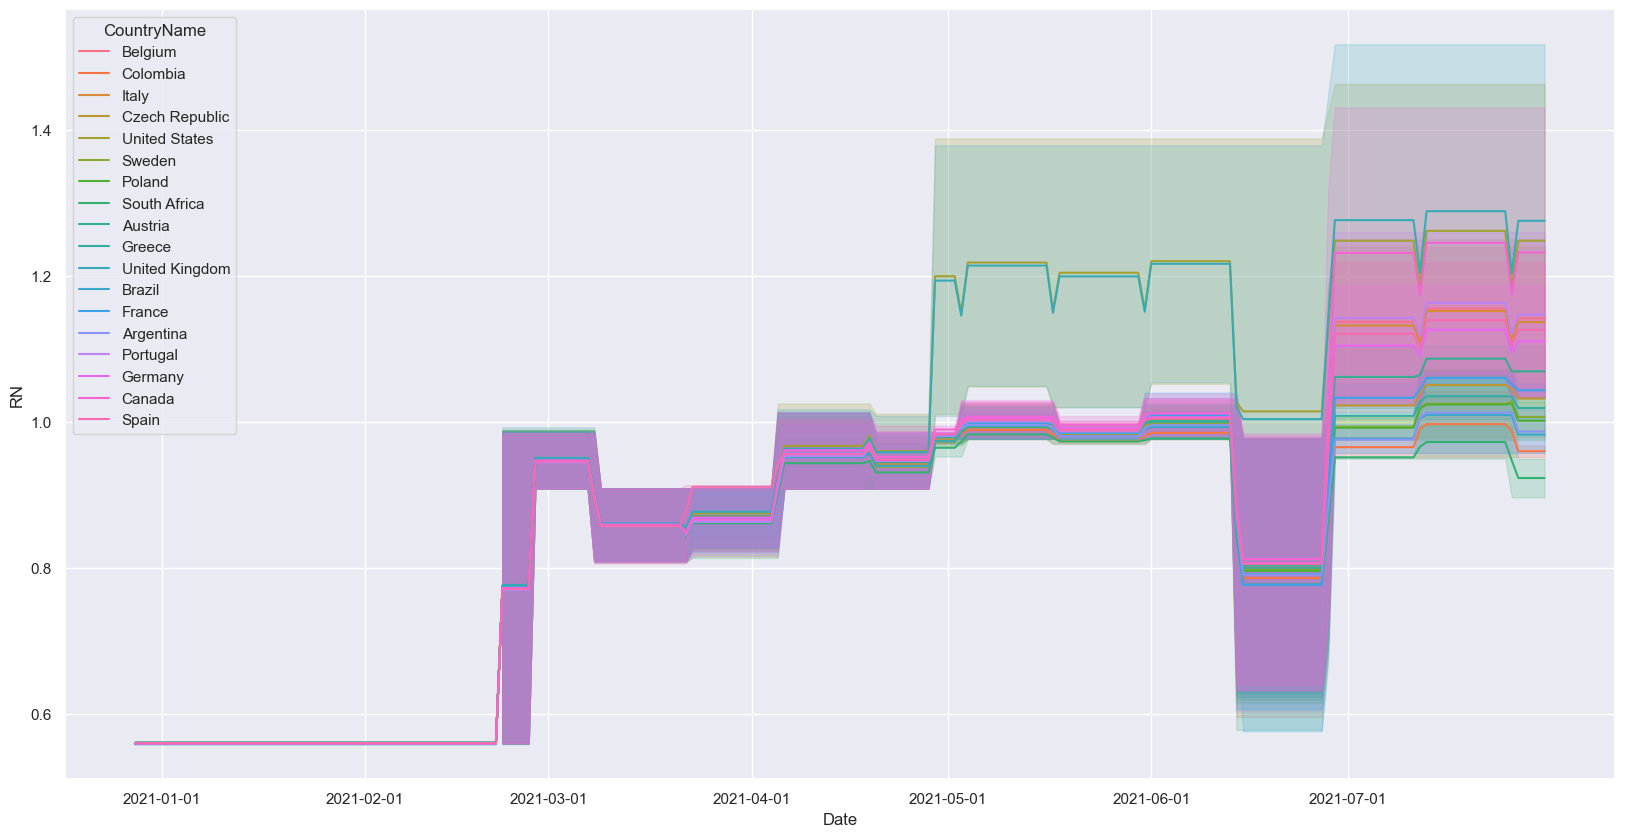

In [7]:
# Let's plot the RN values of each country during january
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.figure(figsize=(20, 10))

sns.lineplot(x="Date", y="RN", hue="CountryName", data=df_training[df_training['Date'] < '2021-08-01'])
# xlabel will be the begin and end of each month
rango = pd.date_range(start='2021-01-01', end='2021-07-01', freq='MS')
# Parse rango to a list of strings
rango = [x.strftime('%Y-%m-%d') for x in rango]
# Set the xticks
plt.xticks(rango)
plt.show()

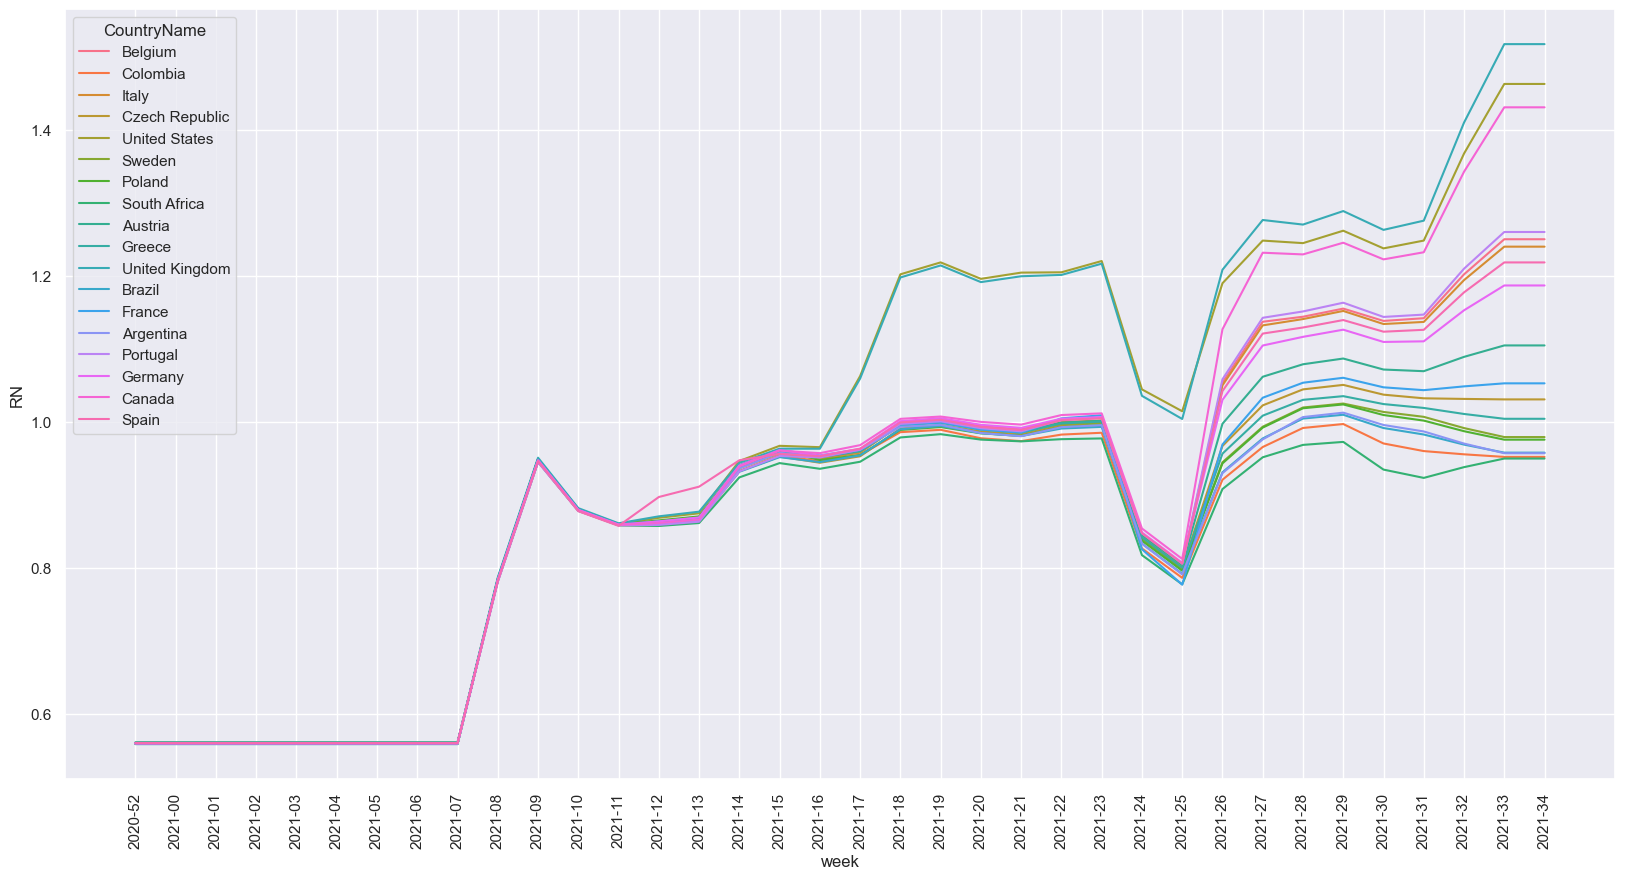

In [8]:
# Now we are going to plot the mean of the RN values of each country during a week
# First we need to group the data by week
df_training['Date'] = pd.to_datetime(df_training['Date'])
df_training['week'] = df_training['Date'].dt.strftime('%Y-%U')
df_training.head()
plt.figure(figsize=(20, 10))
sns.lineplot(x="week", y="RN", hue="CountryName", data=df_training,ci=None)
plt.xticks(rotation=90)
plt.show()

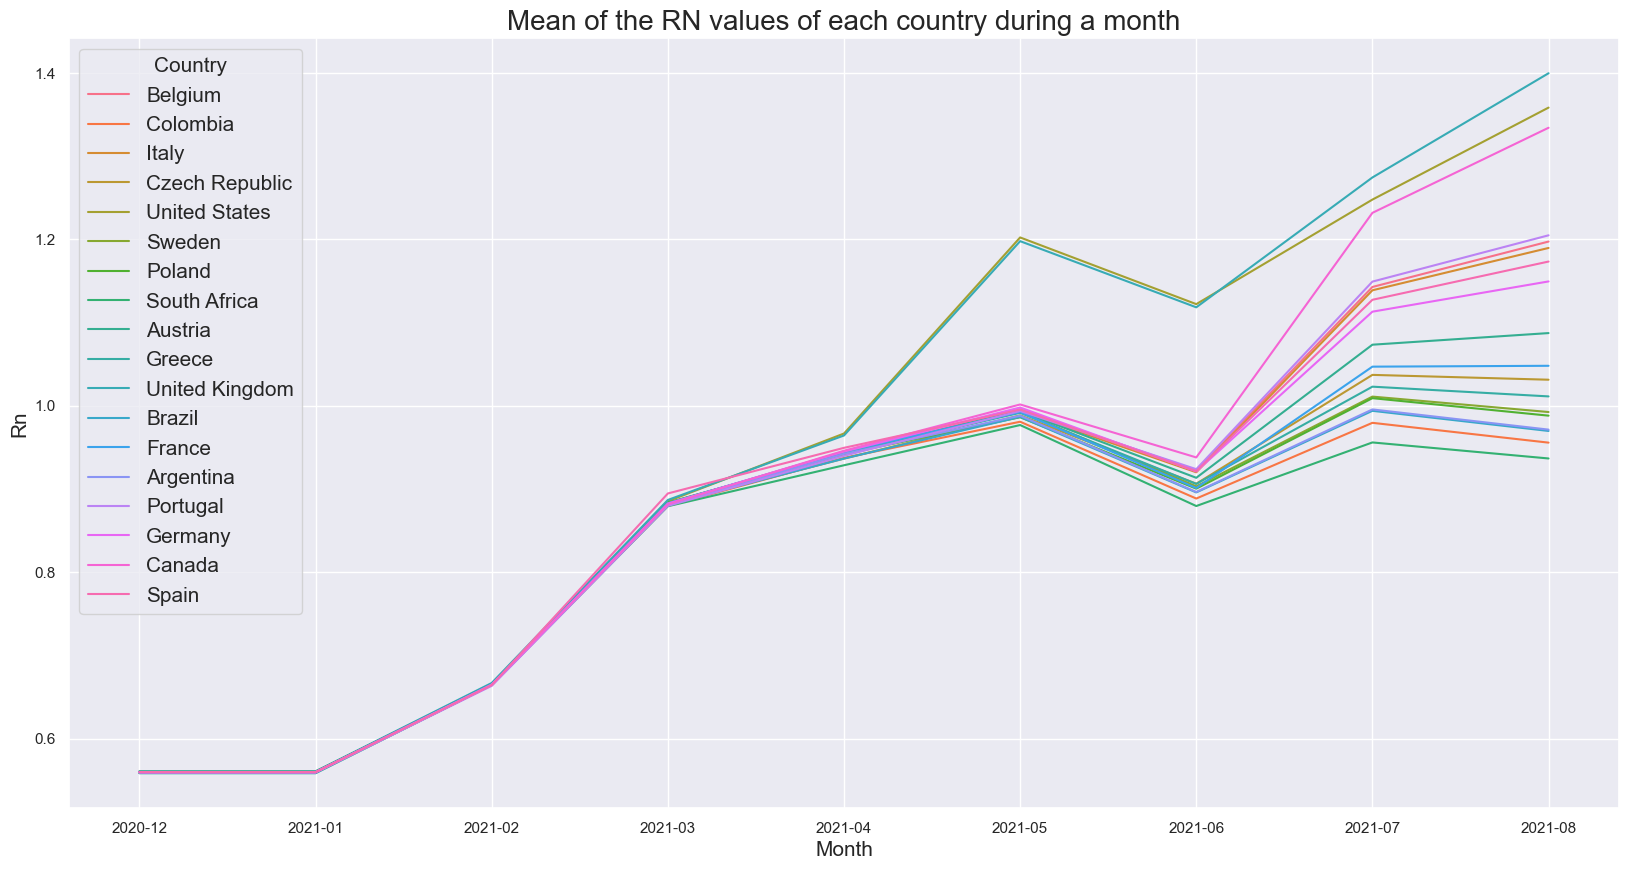

In [23]:
# Now we are going to plot the mean of the RN values of each country during a week
# First we need to group the data by week
df_training['Date'] = pd.to_datetime(df_training['Date'])
df_training['month'] = df_training['Date'].dt.strftime('%Y-%m')
df_training.head()
plt.figure(figsize=(20, 10))
sns.lineplot(x="month", y="RN", hue="CountryName", data=df_training, ci=None)
plt.title('Mean of the RN values of each country during a month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Rn', fontsize=15)
plt.legend(loc='upper left',  title='Country', title_fontsize=15, fontsize=15)
plt.show()

In [26]:
df_training['Date'] = pd.to_datetime(df_training['Date'])
df_training['month'] = df_training['Date'].dt.strftime('%Y-%m')
# Print the ranking of the countries with the highest mean of RN values
print(df_training.groupby('CountryName')['RN'].mean().sort_values(ascending=False))

CountryName
United Kingdom    1.038053
United States     1.031628
Canada            0.965425
Portugal          0.937136
Belgium           0.936680
Spain             0.934795
Italy             0.934290
Germany           0.928432
Austria           0.915043
France            0.905894
Czech Republic    0.901984
Greece            0.899296
Sweden            0.895590
Poland            0.893612
Argentina         0.889403
Brazil            0.887995
Colombia          0.882466
South Africa      0.874011
Name: RN, dtype: float64


In [10]:
pop_size = pd.read_csv('Additional_Context_Data_Global.csv')
# Let's get the data of the countries we are interested in
pop_size = pop_size[pop_size['CountryName'].isin(training_geos)]
pop_size.head()

,CountryName,CountryCode,Population,Population Density (# per km2),Urban population (% of total population),Population ages 65 and above (% of total population),GDP per capita (current US$),Obesity Rate (%),Cancer Rate (%),Share of Deaths from Smoking (%),Pneumonia Death Rate (per 100K),Share of Deaths from Air Pollution (%),CO2 emissions (metric tons per capita),Air transport (# carrier departures worldwide)
5,Argentina,ARG,45195774,16.258510,91.870,11.117789,11683.949620,28.3,1.176869,15.61,56.333694,5.12,4.781508,161688.000
8,Austria,AUT,9006398,107.206927,58.297,19.001566,51461.954780,20.1,2.228315,14.13,4.587226,4.29,6.869868,130260.000
15,Belgium,BEL,11589623,377.214927,98.001,18.788744,47518.636040,22.1,2.129968,18.44,19.686418,4.57,8.328160,140674.000
23,Brazil,BRA,212559417,25.061716,86.569,8.922838,8920.762105,22.1,0.775327,12.43,40.051882,4.91,2.612934,832683.000
30,Canada,CAN,37742154,4.075308,81.411,17.232007,46232.989620,29.4,4.629728,17.67,11.578680,2.80,15.158927,1475062.586


In [11]:
pop_size.Population.max()

331002651

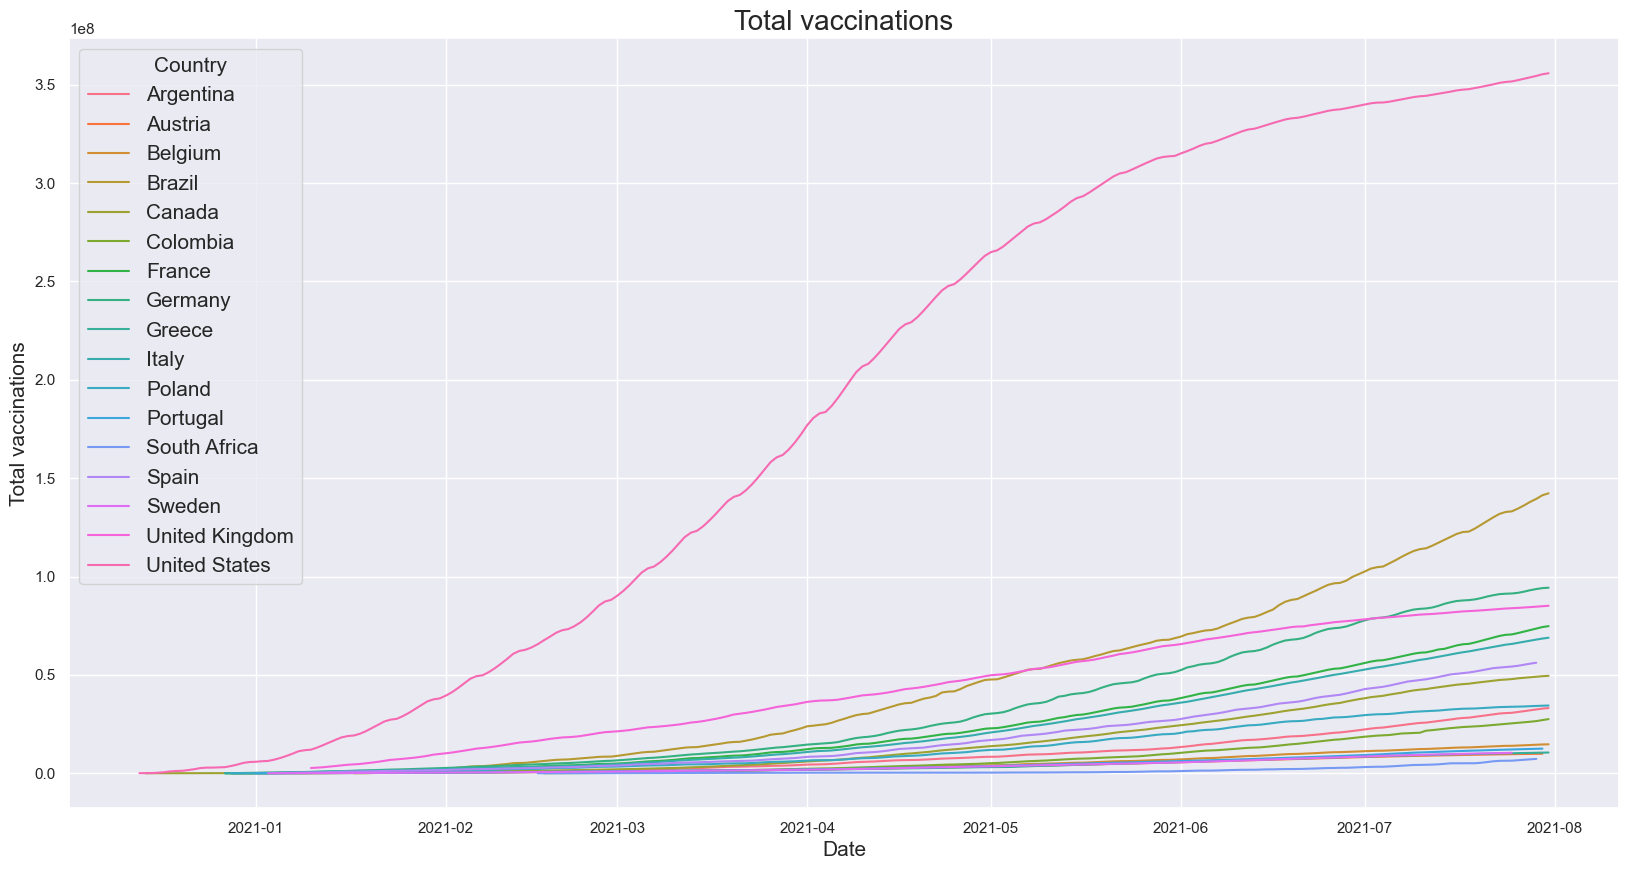

In [25]:

vaccination_df = pd.read_csv("https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv?raw=true")
# Let's get the data of the countries we are interested in
vaccination_df = vaccination_df[vaccination_df['location'].isin(training_geos)]
# Now let's plot the evolution of the vaccination
plt.figure(figsize=(20, 10))
vaccination_df['date'] = pd.to_datetime(vaccination_df['date'])
vac = vaccination_df['date'].dt.strftime('%Y-%m')
sns.lineplot(x="date", y="total_vaccinations", hue="location", data=vaccination_df[vaccination_df['date'] < '2021-08-01'])
plt.title('Total vaccinations', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total vaccinations', fontsize=15)
plt.legend(loc='upper left',  title='Country', title_fontsize=15, fontsize=15)
plt.show()

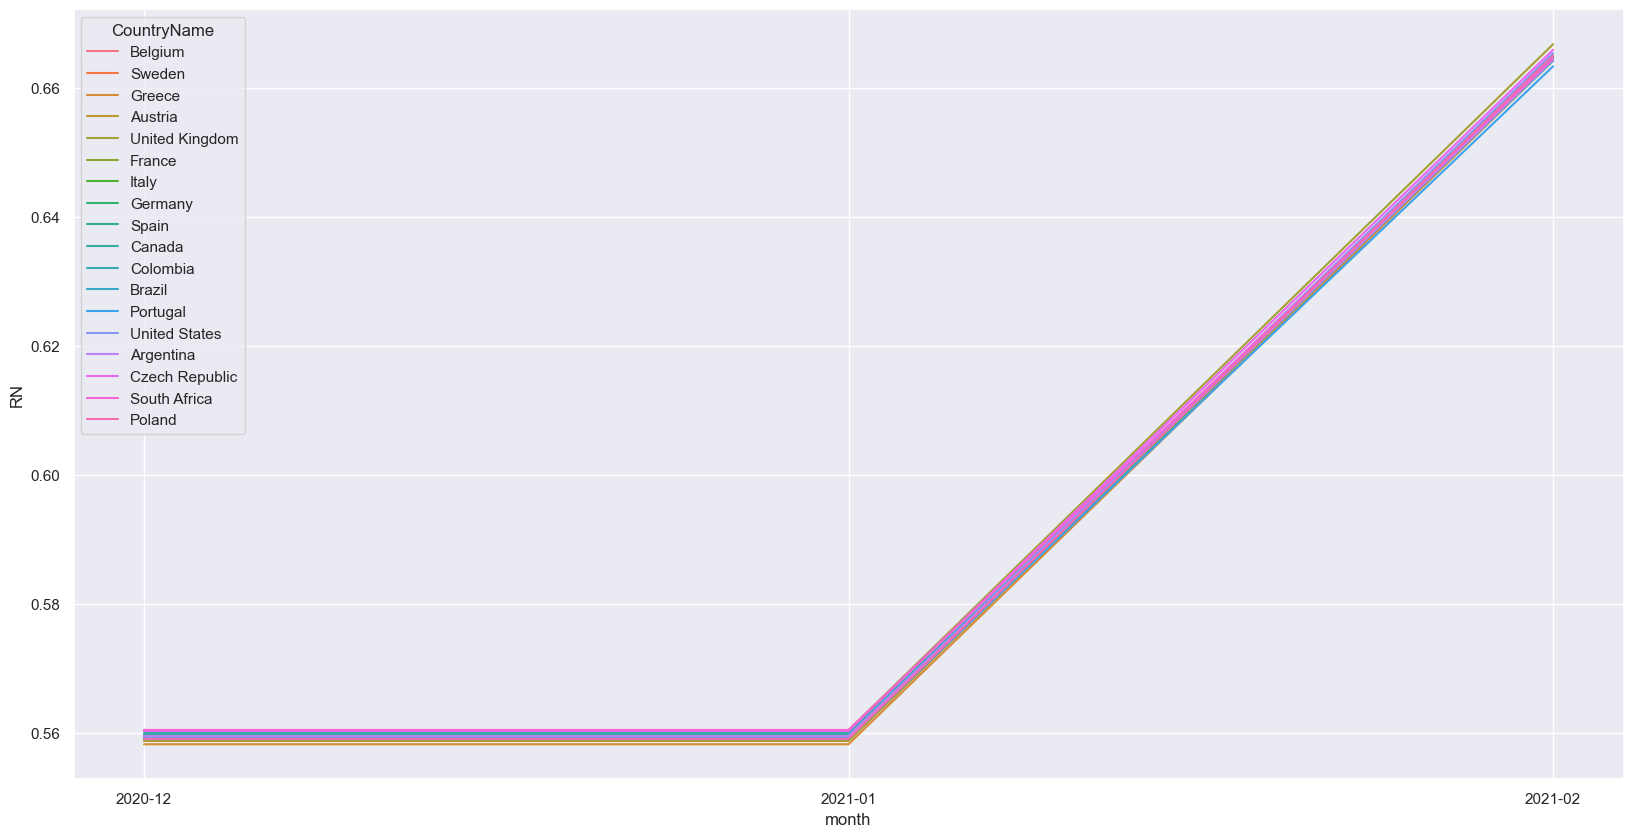

In [13]:
# Now we are going to plot the mean of the RN values of each country during a week
# First we need to group the data by week
df_training['Date'] = pd.to_datetime(df_training['Date'])
df_trainin_jan_feb = df_training[df_training['Date'] < '2021-03-01']
# Sort the dataframe by month
df_trainin_jan_feb = df_trainin_jan_feb.sort_values(by='month')
df_training['week'] = df_trainin_jan_feb['Date'].dt.strftime('%Y-%m')
plt.figure(figsize=(20, 10))
#Plot from 2021-01-01 to 2021-02-01
sns.lineplot(x="month", y="RN", hue="CountryName", data=df_trainin_jan_feb, ci=None)
plt.show()

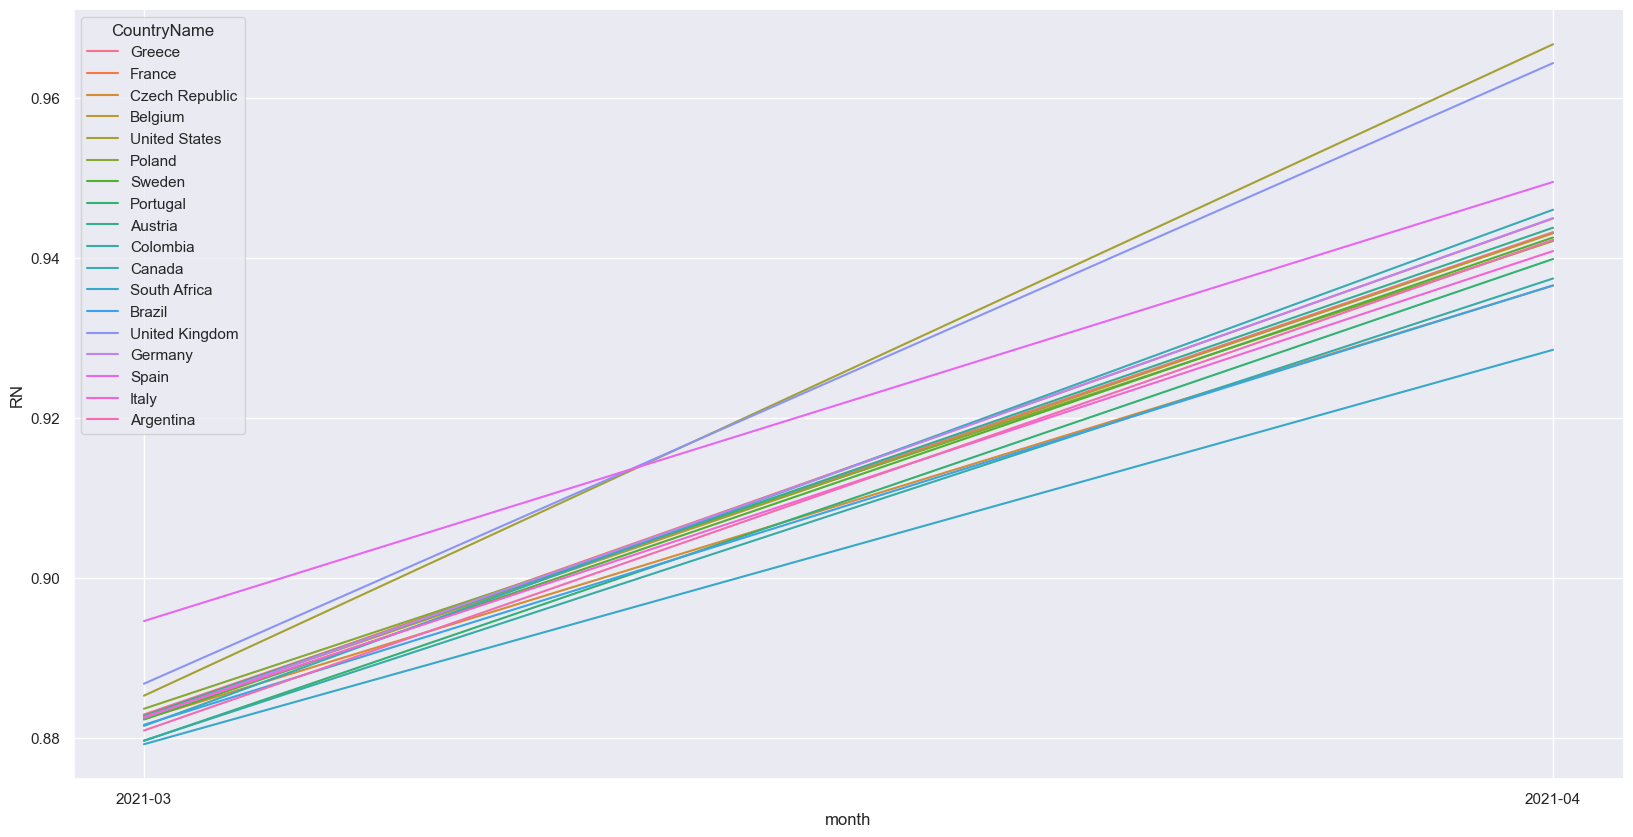

In [14]:
# Now we are going to plot the mean of the RN values of each country during a week
# First we need to group the data by week
df_training['Date'] = pd.to_datetime(df_training['Date'])
df_trainin_jan_feb = df_training[(df_training['Date'] < '2021-05-01') & (df_training['Date'] > '2021-02-28')]
# Sort the dataframe by month
df_trainin_jan_feb = df_trainin_jan_feb.sort_values(by='month')
df_training['week'] = df_trainin_jan_feb['Date'].dt.strftime('%Y-%m')
plt.figure(figsize=(20, 10))
#Plot from 2021-01-01 to 2021-02-01
sns.lineplot(x="month", y="RN", hue="CountryName", data=df_trainin_jan_feb, ci=None)
plt.show()

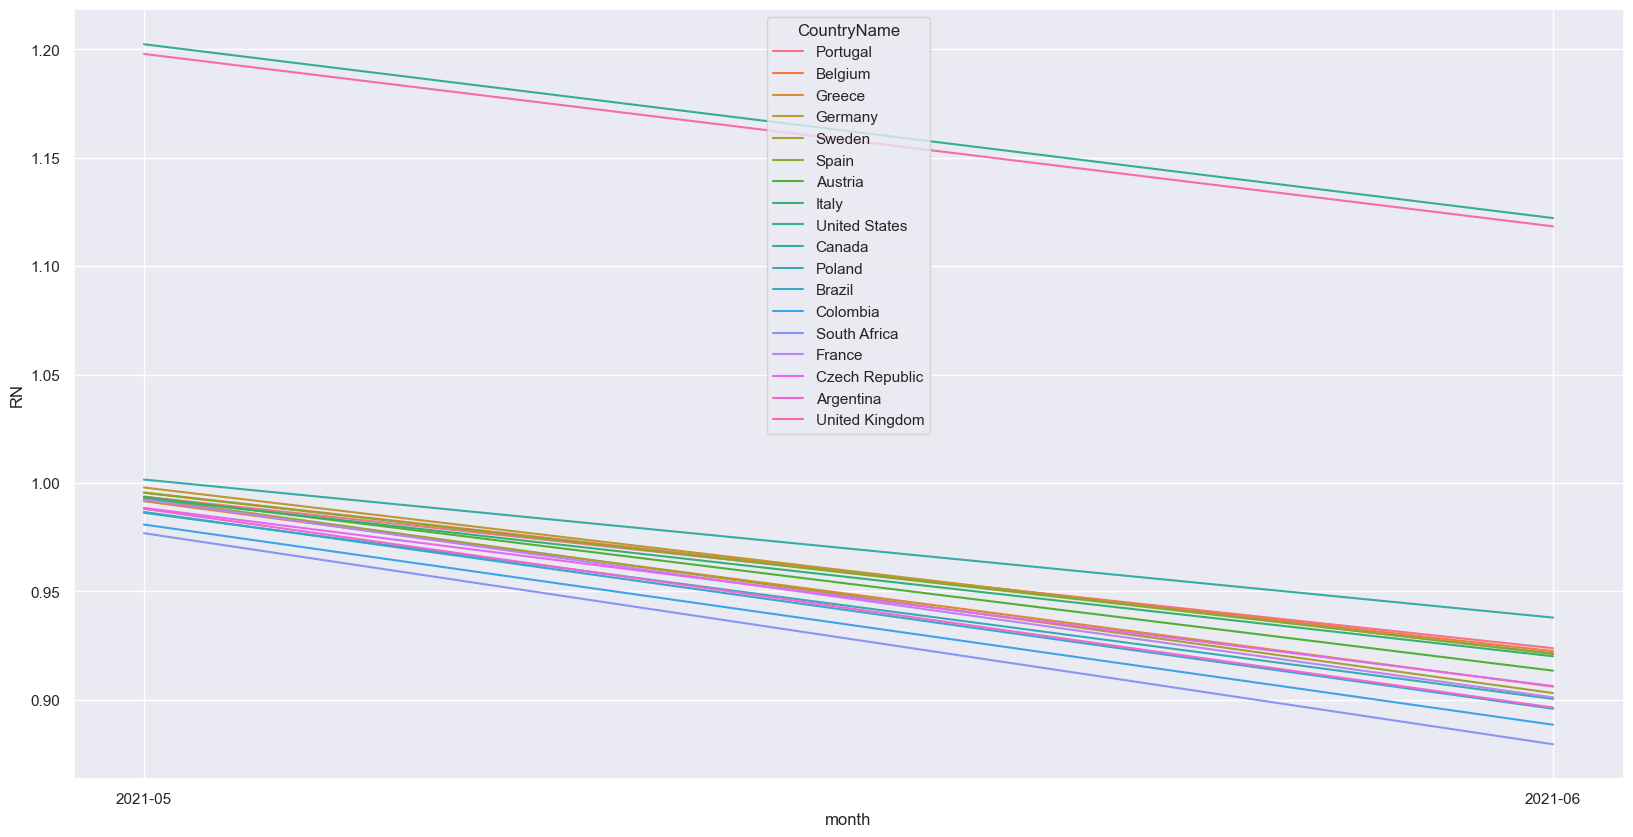

In [15]:
# Now we are going to plot the mean of the RN values of each country during a week
# First we need to group the data by week
df_training['Date'] = pd.to_datetime(df_training['Date'])
df_trainin_jan_feb = df_training[(df_training['Date'] < '2021-07-01') & (df_training['Date'] > '2021-04-30')]
# Sort the dataframe by month
df_trainin_jan_feb = df_trainin_jan_feb.sort_values(by='month')
df_training['week'] = df_trainin_jan_feb['Date'].dt.strftime('%Y-%m')
plt.figure(figsize=(20, 10))
#Plot from 2021-01-01 to 2021-02-01
sns.lineplot(x="month", y="RN", hue="CountryName", data=df_trainin_jan_feb, ci=None)
plt.show()

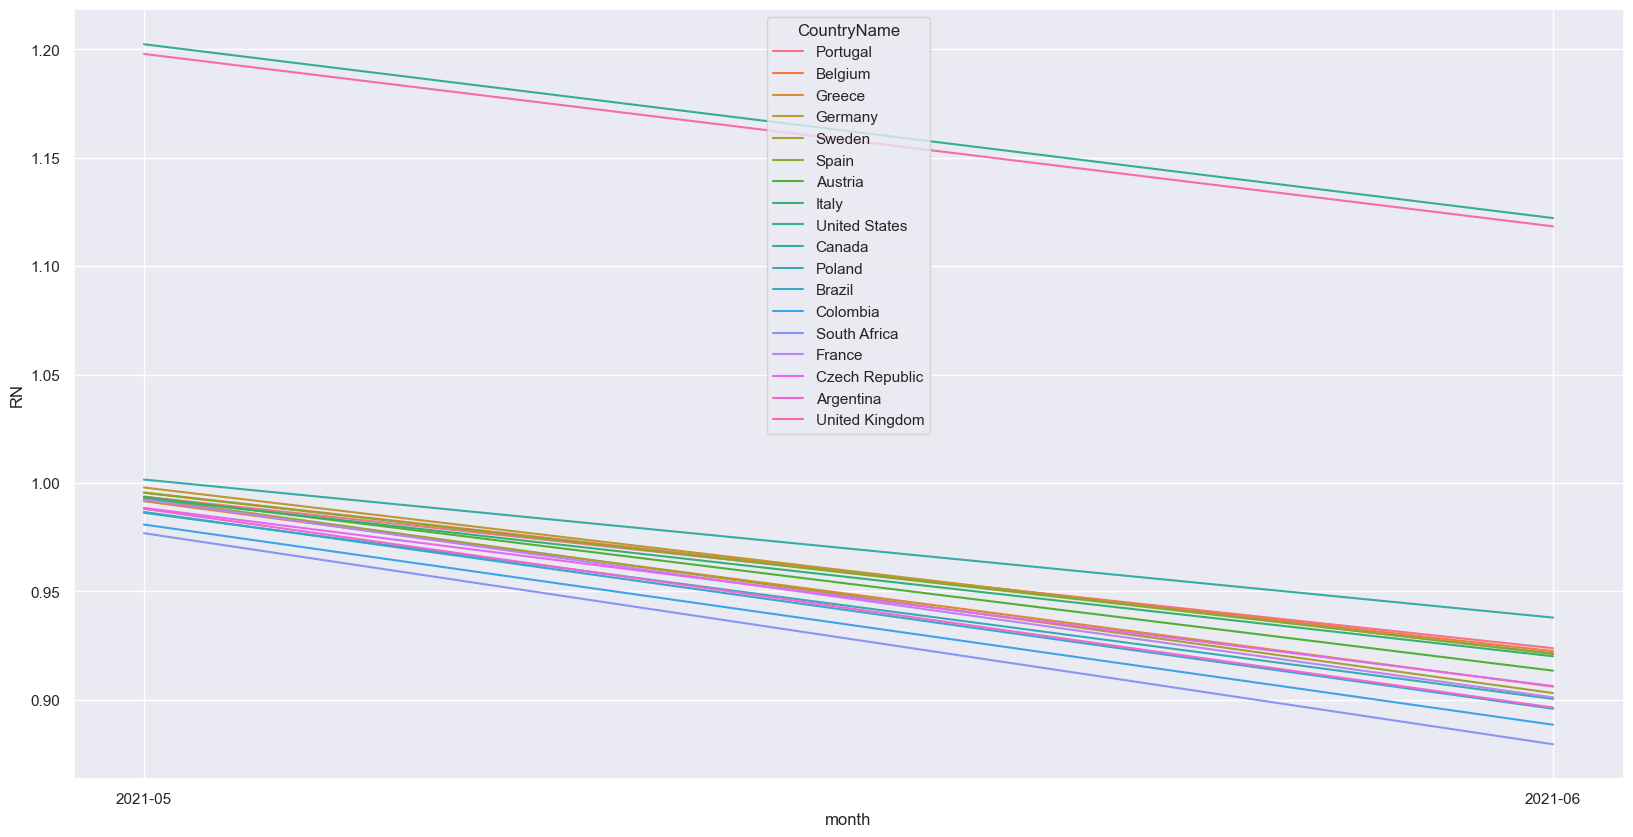

In [16]:
# Now we are going to plot the mean of the RN values of each country during a week
# First we need to group the data by week
df_training['Date'] = pd.to_datetime(df_training['Date'])
df_trainin_jan_feb = df_training[(df_training['Date'] < '2021-07-01') & (df_training['Date'] > '2021-04-30')]
# Sort the dataframe by month
df_trainin_jan_feb = df_trainin_jan_feb.sort_values(by='month')
df_training['week'] = df_trainin_jan_feb['Date'].dt.strftime('%Y-%m')
plt.figure(figsize=(20, 10))
#Plot from 2021-01-01 to 2021-02-01
sns.lineplot(x="month", y="RN", hue="CountryName", data=df_trainin_jan_feb, ci=None)
plt.show()